<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Kaggle_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Basic Analysis of the Covid19 dataset**<br>
**Findings**<br>
1. It doesn't seem practical to fit any predictions model at the moment.  One can obivously use a number of of mdelling technique starting with linear regression yet the range of possible scenarios across geographies is very significant. 
2. The epidemic development scenarios seems to be bounded by 2 border cases with Hubei province of China and Italy representing upper bound and Japan representing the lower bound. Singapore and Hong Kong (and some China provinces) somewhat close to Japan's pattern yet those geogrpahies are much smaller in scale
3. NY and CA seems to be closer to the Italy pattern yet it is to early to tell whether they will continue on the same trajectory
4. Italy looks as the worst case scenario by every criteria
5. Here is a useful resource for traking overall numbers: https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

In [0]:
# Use seaborn for the correlation heatmap
!pip install seaborn

In [0]:
import warnings
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import math
# Time related libraries
import time

In [3]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving covid19-global-forecasting-week-1.zip to covid19-global-forecasting-week-1.zip


In [4]:
#Unzipping if needed
!unzip covid19-global-forecasting-week-1.zip

Archive:  covid19-global-forecasting-week-1.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [0]:
#read file & check the upload
df = pd.read_csv('train.csv')
df_filtered = df.loc[df['ConfirmedCases'] != 0]
df_filtered.head(10)

In [0]:
data_shape = df.shape
print(data_shape)

(16188, 8)


In [0]:
#data cleaning & exploration
unknown_count = df.isna().sum().drop_duplicates()
unknown_count[unknown_count>0]

In [0]:
df['Country/Region'].unique()

In [0]:
df_China = df[df['Country/Region']=='China']
df_China.head(30)

In [0]:
df_China['Province/State'].unique()

**Plots**

**China Only**

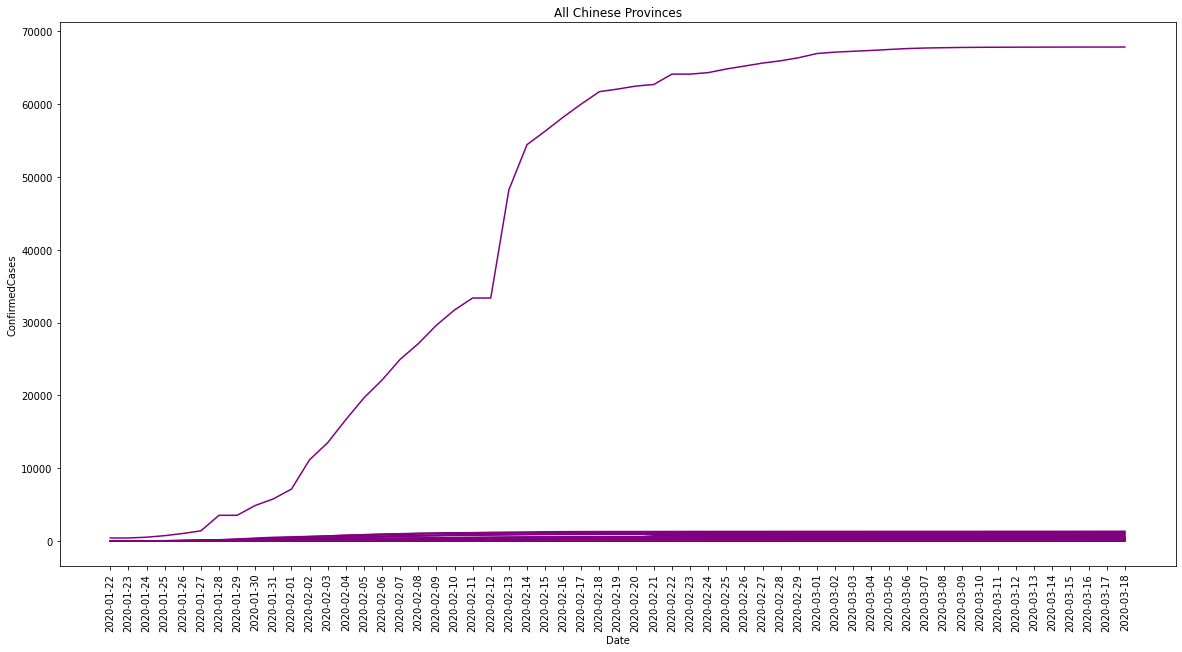

In [81]:
#China Data - All Provinces
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sources = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']
for source in sources:
  # Add x-axis and y-axis
  ax.plot(df.loc[df['Province/State'] == source,'Date'],
          df.loc[df['Province/State'] == source, 'ConfirmedCases'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="All Chinese Provinces")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

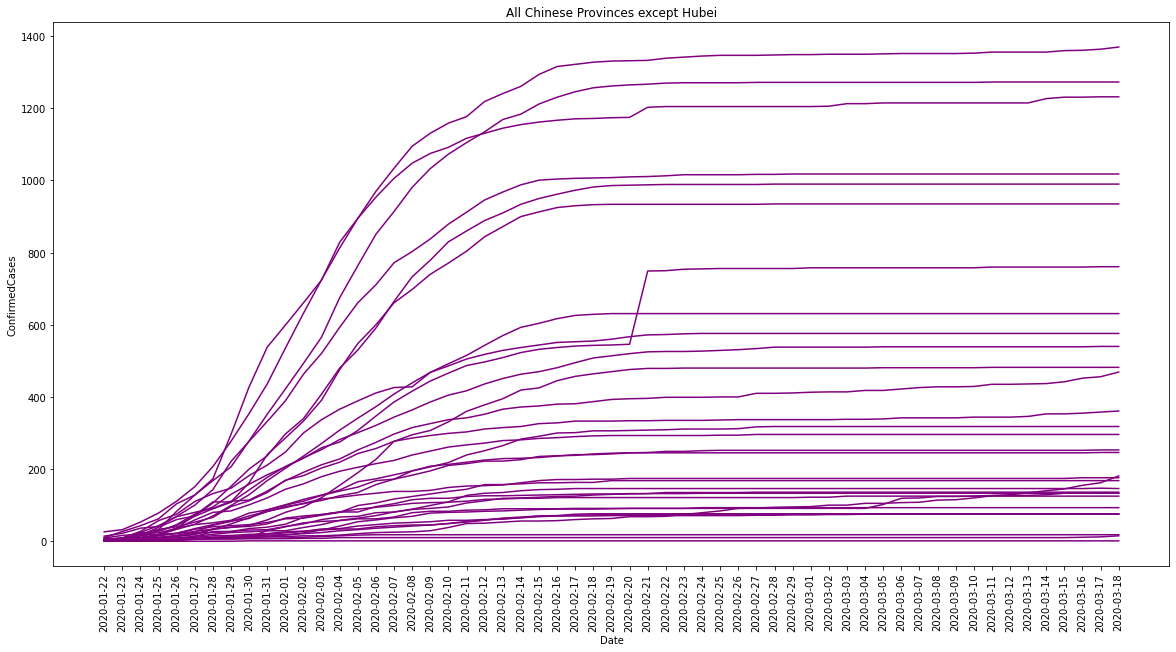

In [82]:
# China Without Hubei Province
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sources = ['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']
for source in sources:
  # Add x-axis and y-axis
  ax.plot(df.loc[df['Province/State'] == source,'Date'],
          df.loc[df['Province/State'] == source, 'ConfirmedCases'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="All Chinese Provinces except Hubei")
plt.xticks(rotation=90)
#plt.legend(loc='upper left')
plt.show()

In [0]:
df_Hubei = df[df['Province/State']=='Hubei']
df_Hubei.head(30)

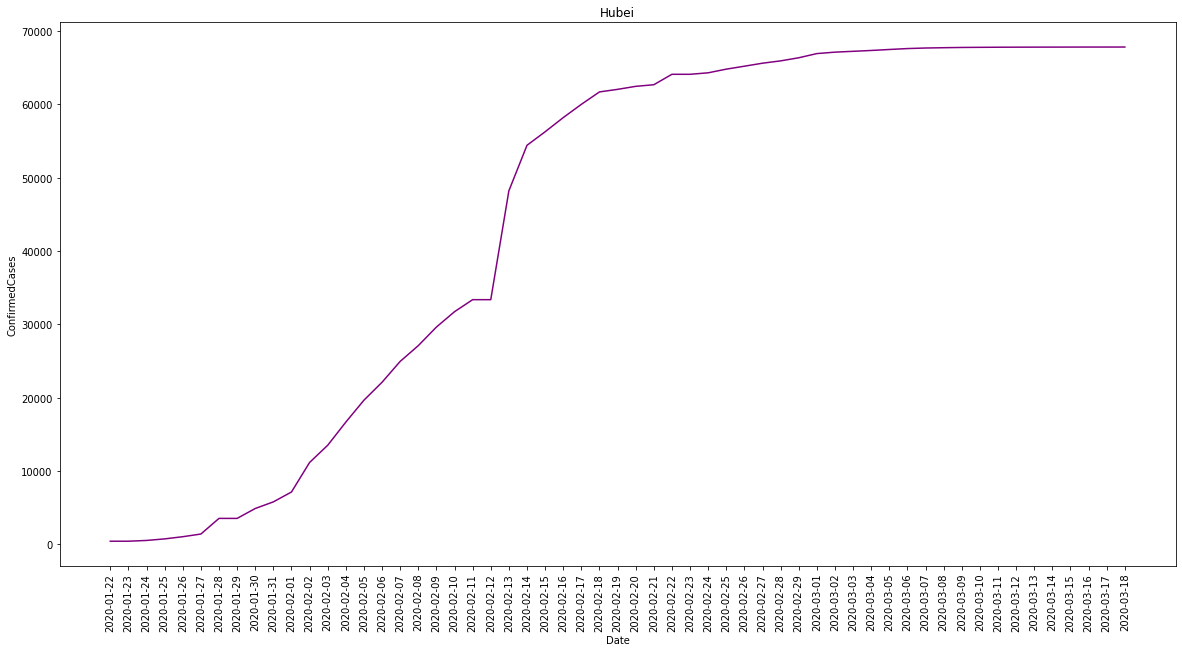

In [83]:
# Hubei Province
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_Hubei['Date'],
        df_Hubei['ConfirmedCases'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Hubei")
plt.xticks(rotation=90)
plt.show()

**US: NY vs CA**

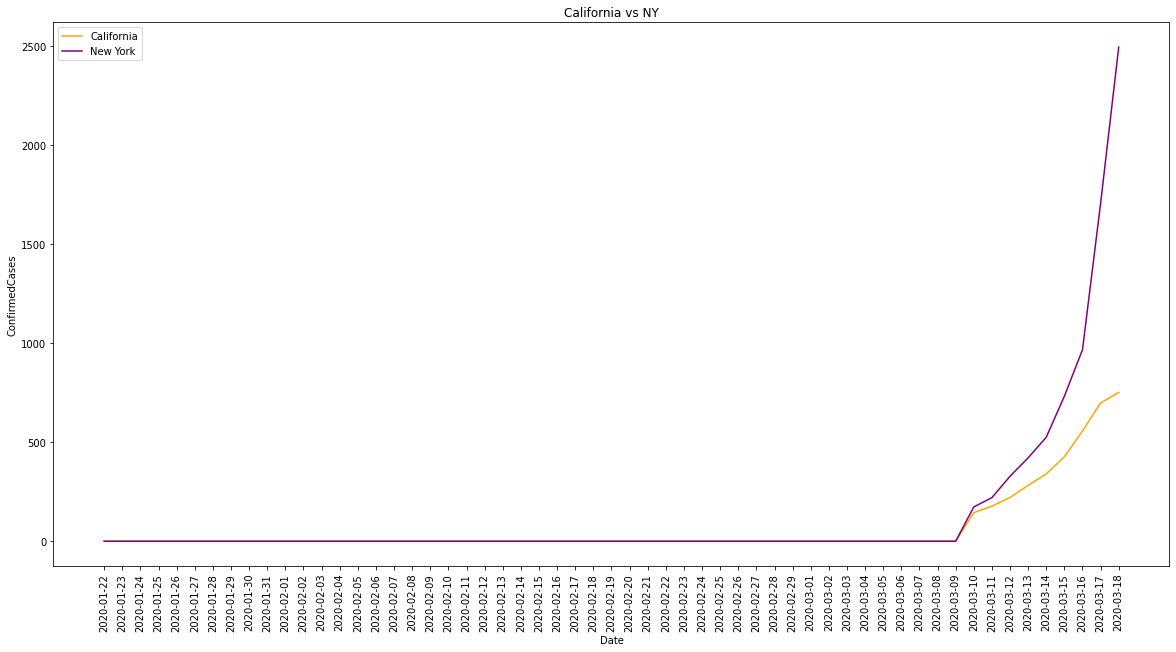

In [80]:
# California and NY
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))
sources = [('California','orange'),('New York','purple')]
for source in sources:
  # Add x-axis and y-axis
  ax.plot(df.loc[df['Province/State'] == source[0],'Date'],
          df.loc[df['Province/State'] == source[0], 'ConfirmedCases'],
          label = source[0],
          color=source[1])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="California vs NY")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

**Japan vs South Korea vs Italy vs NY**

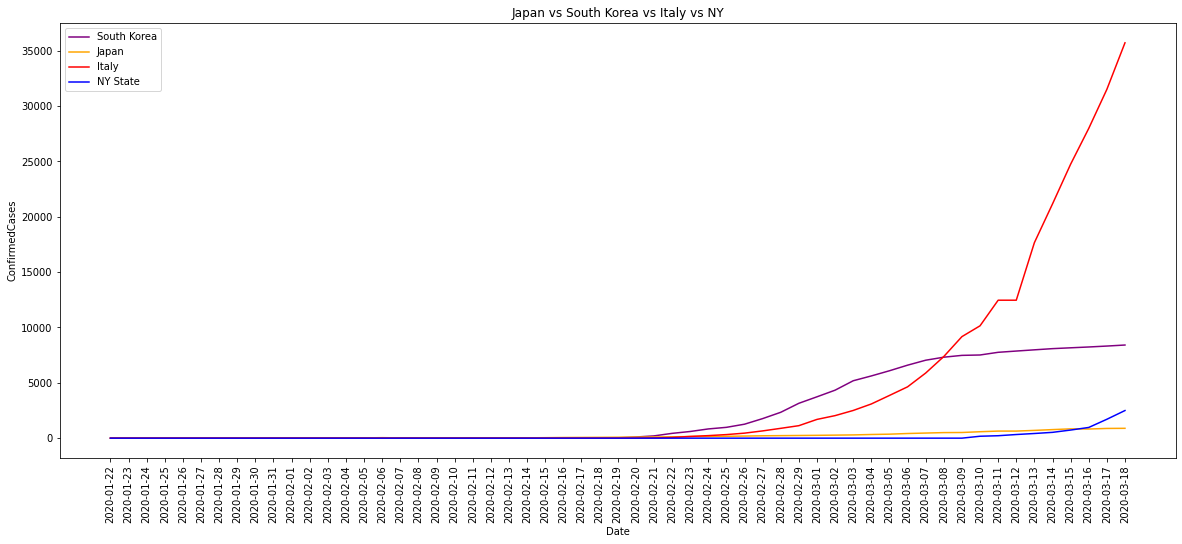

In [6]:
# Japan vs South Korea vs Italy vs NY
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 8))

# Add x-axis and y-axis
ax.plot(df.loc[df['Country/Region'] == 'Korea, South','Date'],
        df.loc[df['Country/Region'] == 'Korea, South', 'ConfirmedCases'],
        label = 'South Korea',
        color='purple')
ax.plot(df.loc[df['Country/Region'] == 'Japan','Date'],
        df.loc[df['Country/Region'] == 'Japan', 'ConfirmedCases'],
        label = 'Japan',
        color='orange')
ax.plot(df.loc[df['Country/Region'] == 'Italy', 'Date'],
        df.loc[df['Country/Region'] == 'Italy', 'ConfirmedCases'],
        label = 'Italy',
        color='red')
ax.plot(df.loc[df['Province/State'] == 'New York','Date'],
        df.loc[df['Province/State'] == 'New York', 'ConfirmedCases'],
        label = 'NY State',
        color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases", 
       title="Japan vs South Korea vs Italy vs NY")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

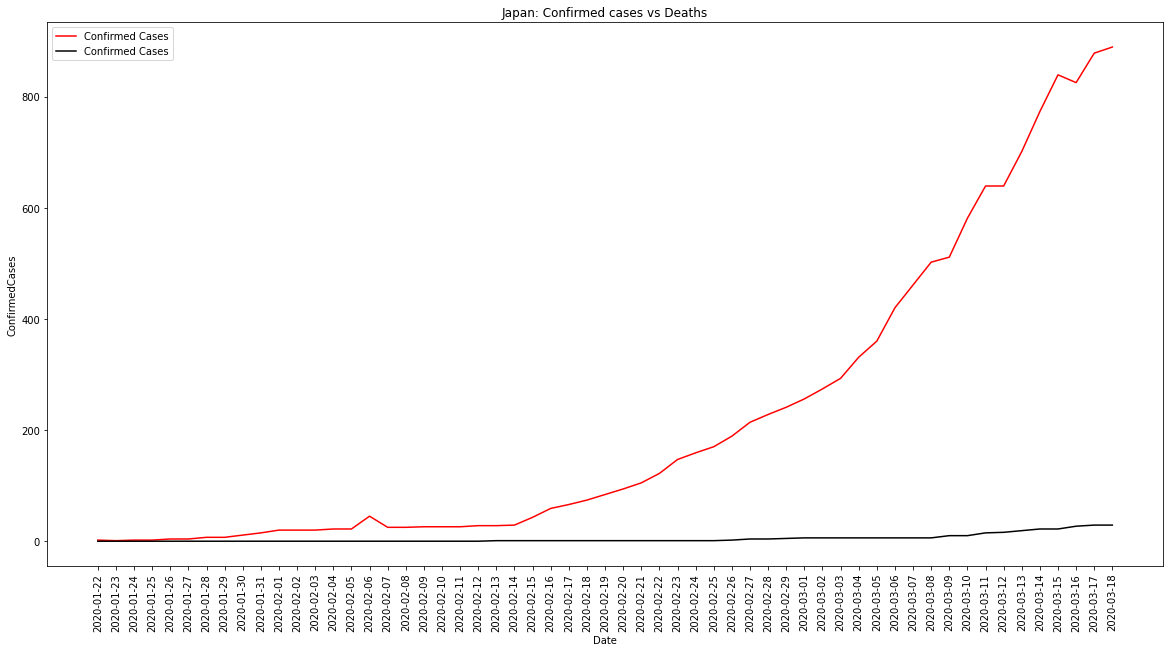

In [21]:
# Confirmed VS Deaths Japan
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df.loc[df['Country/Region'] == 'Japan','Date'],
        df.loc[df['Country/Region'] == 'Japan', 'ConfirmedCases'],
        label = 'Confirmed Cases',
        color='red')

ax.plot(df.loc[df['Country/Region'] == 'Japan','Date'],
        df.loc[df['Country/Region'] == 'Japan', 'Fatalities'],
        label = 'Confirmed Cases',
        color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Japan: Confirmed cases vs Deaths")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()
# Confirmed vs Deaths South Korea
# Confirmed vs Deaths Italy

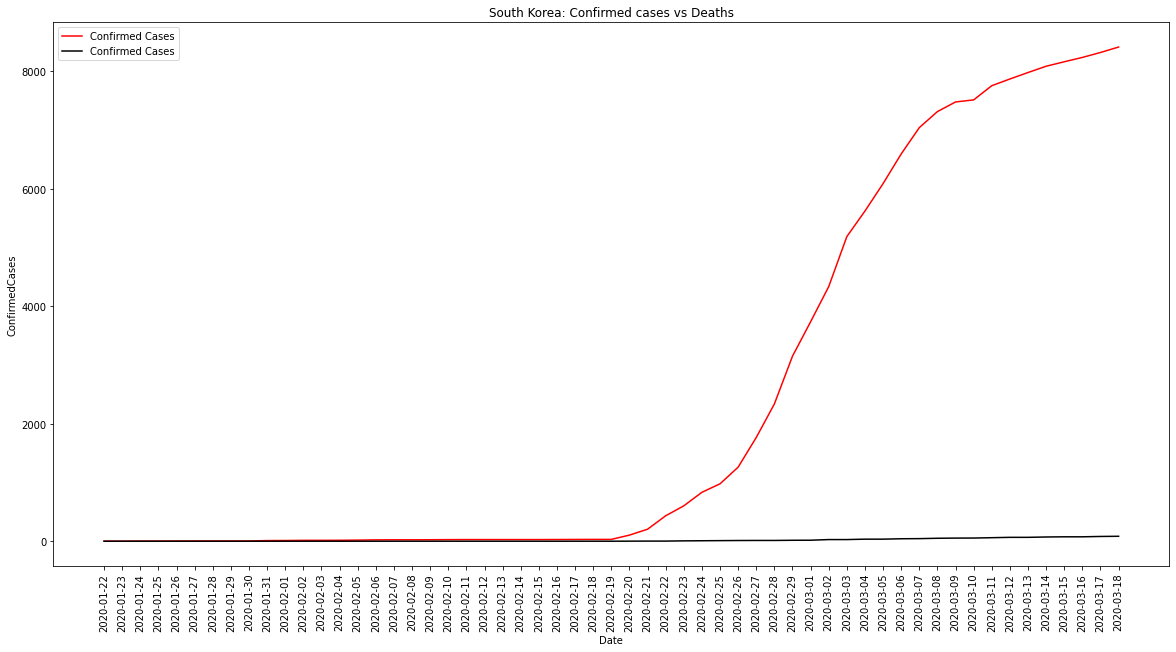

In [19]:
# Confirmed vs Deaths South Korea
# Confirmed VS Deaths Japan
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df.loc[df['Country/Region'] == 'Korea, South','Date'],
        df.loc[df['Country/Region'] == 'Korea, South', 'ConfirmedCases'],
        label = 'Confirmed Cases',
        color='red')

ax.plot(df.loc[df['Country/Region'] == 'Korea, South','Date'],
        df.loc[df['Country/Region'] == 'Korea, South', 'Fatalities'],
        label = 'Confirmed Cases',
        color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="South Korea: Confirmed cases vs Deaths")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

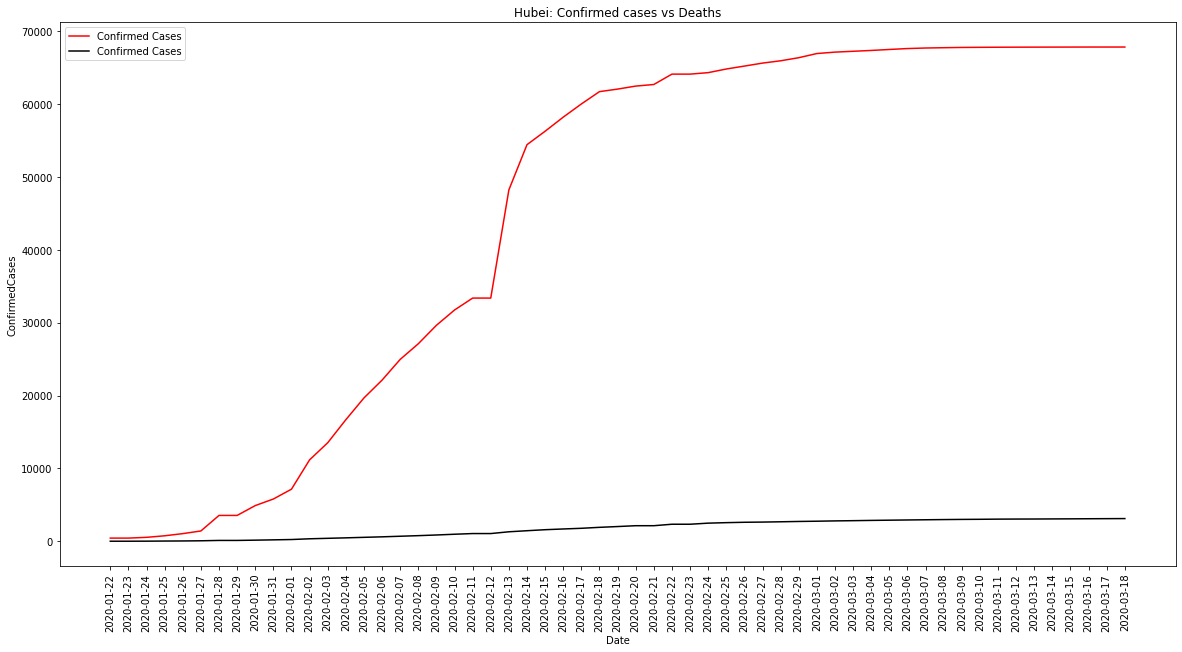

In [13]:
# Cofirmed vs Deaths Hubei
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df.loc[df['Province/State'] == 'Hubei','Date'],
        df.loc[df['Province/State'] == 'Hubei', 'ConfirmedCases'],
        label = 'Confirmed Cases',
        color='red')

ax.plot(df.loc[df['Province/State'] == 'Hubei','Date'],
        df.loc[df['Province/State'] == 'Hubei', 'Fatalities'],
        label = 'Confirmed Cases',
        color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Hubei: Confirmed cases vs Deaths")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

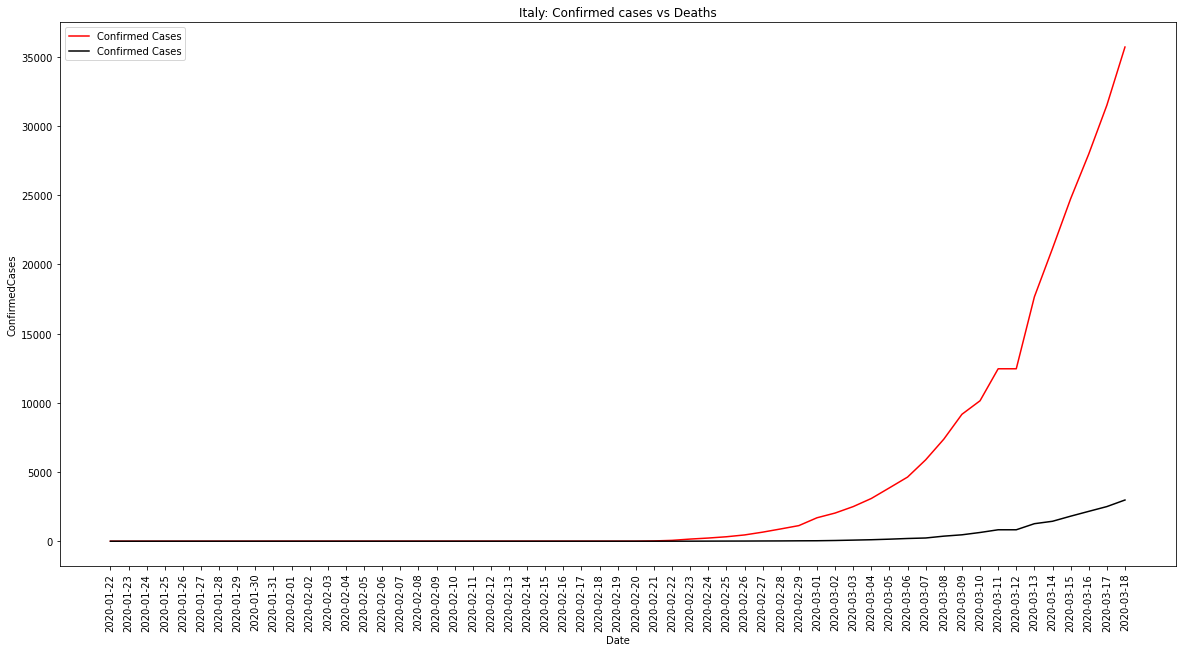

In [17]:
# Cofirmed vs Deaths Italy
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df.loc[df['Country/Region'] == 'Italy','Date'],
        df.loc[df['Country/Region'] == 'Italy', 'ConfirmedCases'],
        label = 'Confirmed Cases',
        color='red')

ax.plot(df.loc[df['Country/Region'] == 'Italy','Date'],
        df.loc[df['Country/Region'] == 'Italy', 'Fatalities'],
        label = 'Confirmed Cases',
        color='black')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ConfirmedCases",
       title="Italy: Confirmed cases vs Deaths")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()